# Hyperparameter tuning

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

/home/nirali/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from time import time

# Starting the time 

In [4]:
tick = time()

# Importing MNIST database

In [5]:
mnist  = input_data.read_data_sets("/tmp/data",one_hot =True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
sample  = mnist.train.images[2].reshape(28,28)

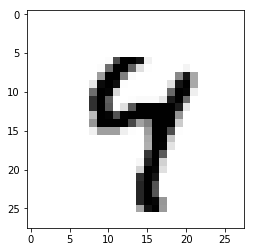

In [9]:
plt.imshow(sample,cmap ='Greys')

In [10]:
batch_size = 100
n_classes = 10
n_samples = mnist.train.num_examples
n_input  = 784
n_output =10

# Defining a Multilayer Perceptron

In [12]:
def multilayer_perceptron(x,weights,biases):
    
    '''
    x:Placeholder for data input
    weights : dictionary for weights
    biases : dict of bias values
    '''
    #First hidden Layer activation RELU activation 
    #x*w + bias
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(x*w+bias) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1) 
    
    
    #Second hidden layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2) 
    
    #Output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [13]:
sess = tf.InteractiveSession()

# Defining a function which loops over varying learning rates and number of neurons in hidden layer

In [14]:
def model(training_epochs,l,n_hidden_1,n_hidden_2):
        
        weights= {
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
        }
        
        biases= {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
        }
        x = tf.placeholder('float',[None,n_input])
        y = tf.placeholder('float',[None, n_classes])
        pred = multilayer_perceptron(x,weights,biases)
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( logits=pred, labels=y))
        optimizer = tf.train.AdamOptimizer(learning_rate=l).minimize(cost)
        #initializing variables
        init = tf.initialize_all_variables()
        sess.run(init)
        learning_rate = l
        for epoch in range(training_epochs):
                #cost
            avg_cost= 0.0

            total_batch = int(n_samples/batch_size) #55000/100 batches total

            for i in range(total_batch):

                batch_x,batch_y = mnist.train.next_batch(batch_size)

                _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})

                avg_cost += c/total_batch

            print("Epoch : {}  cost{:4f}".format(epoch+1,avg_cost ) ) 

        print("Model has completed {} epochs of training".format(training_epochs))
        correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
        correct_predictions = tf.cast(correct_predictions,'float')
        accuracy = tf.reduce_mean(correct_predictions)
        acc = accuracy.eval({x:mnist.test.images,y:mnist.test.labels})
        error = 1 - acc
        print("Accuracy : {}".format(acc))
        print("Error : {}".format(error))
        return error

In [15]:
t = mnist.train.next_batch(1)

In [16]:
Xsamp , ysamp = t

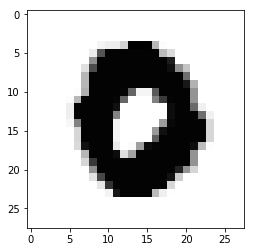

In [17]:
plt.imshow(Xsamp.reshape(28,28),cmap='Greys')

In [18]:
ysamp

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
import numpy as np
import pandas as pd
df = pd.DataFrame(columns=['learning_rate','hidden_layer_neurons','error'])
learning_rates = np.array([0.001,0.005,0.01,0.05,0.1])
hidden_count = np.array([64, 128, 256, 512, 1024])
for i in learning_rates:
    print("Learning rate : {} ".format(i))
    for j in hidden_count:
        print("Number of neurons in hidden layers : {} ".format(j))
        error = model(5,i,j,j)
        df = df.append({'learning_rate': i,'hidden_layer_neurons':j,'error':error}, ignore_index=True)

Learning rate : 0.001 
Number of neurons in hidden layers : 64 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch : 1  cost82.041746
Epoch : 2  cost17.637320
Epoch : 3  cost11.076300
Epoch : 4  cost7.965335
Epoch : 5  cost6.160257
Model has completed 5 epochs of training
Accuracy : 0.866100013256073
Error : 0.133899986743927
Number of neurons in hidden layers : 128 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch : 1  cost143.664052
Epoch : 2  cost27.491447
Epoch : 3  cost17.510495
Epoch : 4  cost12.686122
Epoch : 5  cost9.734096
Model has completed 5 epochs of training
Accuracy : 0.9017999768257141
Error : 0.09820002317428589
Number of neurons in hidden layers : 256 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch : 1  cost178.787398
Epoch : 2  cost41.036828
Epoch : 3  cost26.311306
Epoch : 4  cost18.285633
Epoch : 5  cost13.291671
Model has completed 5 epochs of training
Accuracy : 0.9230999

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch : 1  cost12.489694
Epoch : 2  cost0.699161
Epoch : 3  cost0.320787
Epoch : 4  cost0.245774
Epoch : 5  cost0.248445
Model has completed 5 epochs of training
Accuracy : 0.930400013923645
Error : 0.06959998607635498
Number of neurons in hidden layers : 256 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch : 1  cost33.897371
Epoch : 2  cost0.652649
Epoch : 3  cost0.376100
Epoch : 4  cost0.299683
Epoch : 5  cost0.261743
Model has completed 5 epochs of training
Accuracy : 0.925000011920929
Error : 0.07499998807907104
Number of neurons in hidden layers : 512 
Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch : 1  cost105.588325
Epoch : 2  cost2.280934
Epoch : 3  cost0.433203
Epoch : 4  cost0.305305
Epoch : 5  cost0.294986
Model has completed 5 epochs of training
Accuracy : 0.9261000156402588
Error : 0.07389998435974121
Number of neurons in hidden layers 

# Accuracy is highest for learning rate 0.005 and number of neurons 1024

In [20]:
df

,learning_rate,hidden_layer_neurons,error
0,0.001,64.0,0.1339
1,0.001,128.0,0.0982
2,0.001,256.0,0.0769
3,0.001,512.0,0.0607
4,0.001,1024.0,0.0463
5,0.005,64.0,0.0879
6,0.005,128.0,0.0694
7,0.005,256.0,0.0482
8,0.005,512.0,0.0413
9,0.005,1024.0,0.0363


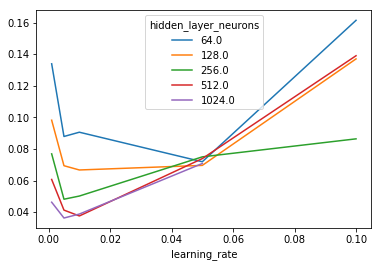

In [21]:
df[df.error<0.2].pivot(index='learning_rate',columns='hidden_layer_neurons',values='error').plot()

In [22]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
tock = time()
print(tock - tick)

1667.1559147834778


# Running the same on spark takes half the time 